In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPClassifier
import sklearn.metrics
from sklearn.metrics import balanced_accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns


### Data Preprocessing

Contents of train_x.csv: arr of shape (2102, 784)
Contents of valid_x.csv: arr of shape (600, 784)


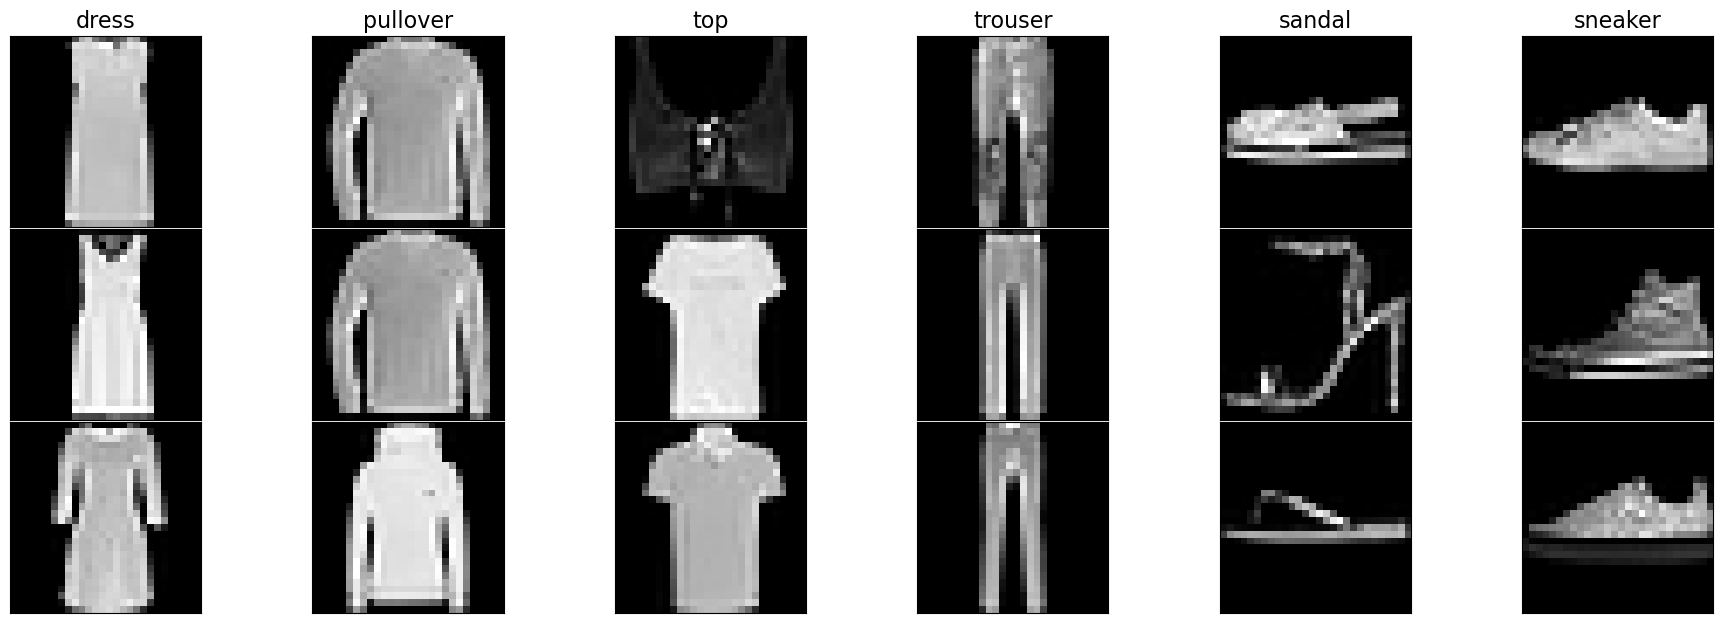

In [44]:
%run load_and_plot_data.py

In [45]:
# valid_y_df[50:]

In [46]:
# temp = np.array(train_y_df)
# count_array = temp[:,1]
# count_train = np.unique(count_array, return_counts = True)

# temp = np.array(valid_y_df)
# count_array = temp[:,1]
# count_valid = np.unique(count_array, return_counts = True)

In [47]:
# count_train, count_valid

In [48]:
train_y = np.array(train_y_df['class_uid'])
valid_y = np.array(valid_y_df['class_uid'])
train_x = train_x
valid_x = valid_x
train_y.shape, valid_y.shape

((2102,), (600,))

In [49]:
# random_indices = np.random.choice(train_x.shape[0], 100, replace=False)

# # Select 100 items from the 2D matrix and corresponding indices from the 1D matrix
# train_x = train_x[random_indices]
# train_y = train_y[random_indices]

In [50]:
train_x.shape, train_x[0].dtype

((2102, 784), dtype('int64'))

In [51]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train_x)
normed_train_x = scaler.transform(train_x)
normed_valid_x = scaler.transform(valid_x)

In [52]:
n = 20
random_states = np.random.randint(1, 1000, size=n)

In [53]:
mlp = MLPClassifier(
            solver='lbfgs',
            # batch_size=200,
            n_iter_no_change = 20
            )


In [54]:
random_states

array([ 12, 123, 513, 277, 991, 287,   8, 950, 190,  33, 405,  67, 736,
       526, 931, 940, 461, 318, 930, 964])

In [102]:
mlp_hyperparameter_grid = dict(
    activation=['relu'],
    hidden_layer_sizes = [ (64, )], 
    max_iter= [50], 
    random_state = random_states,
    alpha = np.logspace(2, -7, 20) 
    )



### fit on train

In [103]:
xall = np.vstack([normed_train_x, normed_valid_x])
yall = np.hstack([train_y, valid_y])

### splitter
valid_indicators_L = np.hstack([
    -1 * np.ones(train_y.size), # -1 means never include this example in any test split
    0  * np.ones(valid_y.size), #  0 means include in the first test split (we count starting at 0 in python)
    ])
my_splitter = sklearn.model_selection.PredefinedSplit(valid_indicators_L)

In [104]:
mlp_searcher = sklearn.model_selection.GridSearchCV(estimator = mlp,
                                                    param_grid = mlp_hyperparameter_grid,
                                                    scoring = 'balanced_accuracy',
                                                    cv = my_splitter,
                                                    return_train_score = True,
                                                    refit=False, verbose=5
                                                   )

In [105]:
# sklearn.metrics.get_scorer_names()

In [106]:
start_time_sec = time.time()
mlp_searcher.fit(xall, yall)
elapsed_time_sec = time.time() - start_time_sec

Fitting 1 folds for each of 400 candidates, totalling 400 fits


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=0.615, test=0.628) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=0.615, test=0.630) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=0.616, test=0.630) total time=   2.4s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=0.615, test=0.630) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=0.614, test=0.628) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=0.614, test=0.630) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=0.616, test=0.628) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=0.614, test=0.630) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=0.614, test=0.628) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=0.615, test=0.630) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=0.616, test=0.623) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=0.614, test=0.630) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=0.616, test=0.630) total time=   2.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=0.610, test=0.630) total time=   1.6s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=0.614, test=0.628) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=0.616, test=0.630) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=0.615, test=0.630) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=0.610, test=0.627) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=0.615, test=0.630) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=100.0, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=0.616, test=0.630) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=0.646, test=0.642) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=0.646, test=0.642) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=0.645, test=0.640) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=0.644, test=0.642) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=0.644, test=0.642) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=0.644, test=0.638) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=0.646, test=0.645) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=0.645, test=0.643) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=0.646, test=0.635) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=0.648, test=0.643) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=0.645, test=0.640) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=0.645, test=0.643) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=0.645, test=0.640) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=0.646, test=0.642) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=0.644, test=0.642) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=0.646, test=0.647) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=0.646, test=0.640) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=0.645, test=0.642) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=0.647, test=0.642) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=33.59818286283783, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=0.644, test=0.640) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=0.657, test=0.647) total time=   1.8s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=0.660, test=0.647) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=0.657, test=0.647) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=0.657, test=0.647) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=0.657, test=0.643) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=0.656, test=0.645) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=0.656, test=0.643) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=0.658, test=0.647) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=0.659, test=0.645) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=0.657, test=0.640) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=0.659, test=0.647) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=0.659, test=0.647) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=0.658, test=0.645) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=0.657, test=0.648) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=0.659, test=0.645) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=0.658, test=0.645) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=0.659, test=0.645) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=0.658, test=0.647) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=0.657, test=0.643) total time=   2.9s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=11.288378916846895, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=0.656, test=0.645) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=0.999, test=0.642) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=0.999, test=0.652) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=0.999, test=0.648) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=0.999, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=0.999, test=0.648) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=0.999, test=0.643) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=0.833, test=0.635) total time=   2.6s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=0.833, test=0.648) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=0.833, test=0.642) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=0.833, test=0.652) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=0.833, test=0.638) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.648) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=0.833, test=0.653) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=0.831, test=0.637) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=0.833, test=0.648) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.645) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.638) total time=   2.6s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.637) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=0.999, test=0.647) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=3.79269019073225, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=0.999, test=0.653) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.640) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.650) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.640) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.638) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.648) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.655) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.645) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.650) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.643) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.652) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.653) total time=   1.5s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.663) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.652) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.648) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.648) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=0.999, test=0.662) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.652) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.640) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1.2742749857031341, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.655) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.662) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.662) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.648) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.655) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.645) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.647) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=0.999, test=0.650) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.658) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.658) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.637) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.645) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.655) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.680) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.652) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.660) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.648) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.650) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.652) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.4281332398719396, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.645) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.643) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.653) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.667) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.652) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.650) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.662) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.667) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.663) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.648) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.652) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.658) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.667) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.662) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.708) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.655) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=0.999, test=0.653) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.655) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.648) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.14384498882876628, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.652) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.643) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.658) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.673) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.655) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.673) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.652) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.667) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.662) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.710) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.673) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.722) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.653) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.693) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.660) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.665) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.655) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.645) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.655) total time=   1.6s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.697) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.048329302385717574, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.673) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.673) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.688) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.678) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.693) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.665) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.652) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.660) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.658) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.668) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.667) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.718) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.658) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.668) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.668) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.648) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.650) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.668) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.653) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.693) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.016237767391887224, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.665) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.652) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.680) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.673) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.687) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.657) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.653) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.738) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.657) total time=   1.2s
[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.733) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.682) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.688) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.663) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.768) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.655) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.680) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.722) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.702) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.663) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.680) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.648) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.680) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.658) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.715) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.693) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.653) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.697) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.658) total time=   1.1s
[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.693) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.672) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.670) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.715) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.695) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.643) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.648) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.645) total time=   1.1s
[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.652) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.702) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0018329807108324375, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.682) total time=   1.0s
[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.677) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.662) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.652) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.693) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.675) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.662) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.693) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.668) total time=   1.1s
[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.665) total time=   0.9s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.670) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.650) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.662) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.743) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.653) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.652) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.673) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.665) total time=   1.0s
[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.710) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.665) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.0006158482110660267, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.663) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.683) total time=   1.1s
[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.662) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.665) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.705) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.650) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.715) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.670) total time=   1.1s
[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.667) total time=   1.0s
[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.657) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.687) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.675) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.670) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.693) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.645) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.653) total time=   1.1s
[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.667) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.722) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=0.00020691380811147902, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.662) total time=   1.1s
[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.655) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.652) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.660) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.657) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.667) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.662) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.717) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.670) total time=   1.1s
[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.723) total time=   0.8s
[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.665) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.682) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.677) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.663) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.720) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.672) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.705) total time=   1.0s
[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.660) total time=   3.4s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.740) total time=   1.8s
[CV 1/1] END activation=relu, alpha=6.951927961775606e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.653) total time=   1.1s
[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.657) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.652) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.677) total time=   1.4s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.677) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.693) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.662) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.710) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.677) total time=   1.2s
[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.707) total time=   0.9s
[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.668) total time=   2.6s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.658) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.672) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.665) total time=   2.5s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.655) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.672) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.702) total time=   1.2s
[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.662) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.710) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.335721469090126e-05, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.653) total time=   2.7s
[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.662) total time=   1.1s
[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.658) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.675) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.675) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.688) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.662) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.687) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.672) total time=   1.1s
[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.703) total time=   0.9s
[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.652) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.662) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.742) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.667) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.660) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.655) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.667) total time=   1.1s
[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.663) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.718) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=7.847599703514622e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.662) total time=   1.2s
[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.657) total time=   1.0s
[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.660) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.680) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.677) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.688) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.678) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.685) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.662) total time=   1.0s
[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.700) total time=   0.9s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.647) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.682) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.715) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.662) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.660) total time=   1.1s
[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.650) total time=   2.7s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.663) total time=   1.1s
[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.663) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.732) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.636650898730361e-06, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.652) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.660) total time=   1.1s
[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.660) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.680) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.677) total time=   2.6s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.688) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.672) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.685) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.662) total time=   1.4s
[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.723) total time=   0.9s
[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.655) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.682) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.657) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.717) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.663) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.660) total time=   1.1s
[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.650) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=1.000, test=0.668) total time=   1.2s
[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.663) total time=   1.6s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.732) total time=   6.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=8.858667904100833e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.652) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.662) total time=   1.4s
[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.660) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.675) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.677) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.688) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.672) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.685) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.662) total time=   1.1s
[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.725) total time=   2.4s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.650) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.682) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.657) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.717) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.663) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.660) total time=   1.1s
[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.650) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=0.999, test=0.708) total time=   1.2s
[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.663) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.732) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=2.9763514416313253e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.652) total time=   1.3s
[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=12;, score=(train=1.000, test=0.658) total time=   1.1s
[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=123;, score=(train=1.000, test=0.660) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=513;, score=(train=1.000, test=0.665) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=277;, score=(train=1.000, test=0.677) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=991;, score=(train=1.000, test=0.688) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=287;, score=(train=1.000, test=0.672) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=8;, score=(train=1.000, test=0.685) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=950;, score=(train=1.000, test=0.662) total time=   1.1s
[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=190;, score=(train=1.000, test=0.725) total time=   1.0s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=33;, score=(train=1.000, test=0.648) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=405;, score=(train=1.000, test=0.680) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=67;, score=(train=1.000, test=0.657) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=736;, score=(train=1.000, test=0.717) total time=   1.3s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=526;, score=(train=1.000, test=0.663) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=931;, score=(train=1.000, test=0.660) total time=   1.2s
[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=940;, score=(train=1.000, test=0.650) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=461;, score=(train=0.999, test=0.670) total time=   1.1s
[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=318;, score=(train=1.000, test=0.663) total time=   1.1s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=930;, score=(train=1.000, test=0.732) total time=   1.1s
[CV 1/1] END activation=relu, alpha=1e-07, hidden_layer_sizes=(64,), max_iter=50, random_state=964;, score=(train=1.000, test=0.652) total time=   1.2s


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [107]:
mlp_searcher_result = pd.DataFrame(mlp_searcher.cv_results_).copy()
mlp_searcher_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_max_iter,param_random_state,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
0,1.195594,0.0,0.005837,0.0,relu,100.0,"(64,)",50,12,"{'activation': 'relu', 'alpha': 100.0, 'hidden...",0.628333,0.628333,0.0,394,0.614792,0.614792,0.0
1,1.336619,0.0,0.006572,0.0,relu,100.0,"(64,)",50,123,"{'activation': 'relu', 'alpha': 100.0, 'hidden...",0.630000,0.630000,0.0,381,0.614583,0.614583,0.0
2,2.387014,0.0,0.021130,0.0,relu,100.0,"(64,)",50,513,"{'activation': 'relu', 'alpha': 100.0, 'hidden...",0.630000,0.630000,0.0,381,0.616458,0.616458,0.0
3,1.069688,0.0,0.018278,0.0,relu,100.0,"(64,)",50,277,"{'activation': 'relu', 'alpha': 100.0, 'hidden...",0.630000,0.630000,0.0,381,0.615417,0.615417,0.0
4,1.195337,0.0,0.005874,0.0,relu,100.0,"(64,)",50,991,"{'activation': 'relu', 'alpha': 100.0, 'hidden...",0.628333,0.628333,0.0,394,0.613750,0.613750,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.143340,0.0,0.002009,0.0,relu,0.0,"(64,)",50,940,"{'activation': 'relu', 'alpha': 1e-07, 'hidden...",0.650000,0.650000,0.0,289,1.000000,1.000000,0.0
396,1.133384,0.0,0.003697,0.0,relu,0.0,"(64,)",50,461,"{'activation': 'relu', 'alpha': 1e-07, 'hidden...",0.670000,0.670000,0.0,115,0.999167,0.999167,0.0
397,1.107750,0.0,0.001663,0.0,relu,0.0,"(64,)",50,318,"{'activation': 'relu', 'alpha': 1e-07, 'hidden...",0.663333,0.663333,0.0,149,1.000000,1.000000,0.0
398,1.105570,0.0,0.005714,0.0,relu,0.0,"(64,)",50,930,"{'activation': 'relu', 'alpha': 1e-07, 'hidden...",0.731667,0.731667,0.0,7,1.000000,1.000000,0.0


In [111]:
idx = np.argmax(mlp_searcher_result.mean_test_score)
# idx =50
mlp_searcher_result.params[idx]

{'activation': 'relu',
 'alpha': 0.005455594781168526,
 'hidden_layer_sizes': (64,),
 'max_iter': 50,
 'random_state': 736}

In [112]:
mi = mlp_searcher_result.params[idx]['max_iter']
hlz = mlp_searcher_result.params[idx]['hidden_layer_sizes']
a = mlp_searcher_result.params[idx]['alpha']
mi, hlz

(50, (64,))

In [132]:
mean_results = mlp_searcher_result.mean_test_score
mean_results = np.array(mean_results)
mean_results = np.reshape(mean_results, (mean_results.shape[0]//n ,n))
mean_results = np.sort(mean_results, axis = 1)
mean_results = np.mean(mean_results[:,19:], axis=1)
print(np.max(mean_results),np.argmax(mean_results))

tr_result = np.array(mlp_searcher_result.mean_train_score)
tr_result = np.reshape(tr_result, (tr_result.shape[0]//n, n))
tr_result = np.sort(tr_result, axis =1)
tr_result = np.mean(tr_result[:,19:], axis=1)

param_alpha = np.array(mlp_searcher_result.param_alpha)[::n]
param_hidden_layer_sizes = np.array(mlp_searcher_result.param_hidden_layer_sizes)[::n]
param_max_iter = np.array(mlp_searcher_result.param_max_iter)[::n]

selected_mean_results = mean_results[[0,2,9,13,19]]
selected_train_results = tr_result[[0,2,9,13,19]]

selected_alpha = param_alpha[[0,2,9,13,19]]
selected_hidden_layer_sizes = param_hidden_layer_sizes[[0,2,9,13,19]]
selected_max_iter = param_max_iter[[0,2,9,13,19]]

data = {"Alpha": selected_alpha,
        "Hidden_layer_size" : selected_hidden_layer_sizes,
        "Max Iter" : selected_max_iter,
        "Validation Accuracy": selected_mean_results,
        "Train Accuracy": selected_train_results}

pd.DataFrame(data)


0.7683333333333332 9


,Alpha,Hidden_layer_size,Max Iter,Validation Accuracy,Train Accuracy
0,100.0,"(64,)",50,0.630000,0.616458
1,11.288379,"(64,)",50,0.648333,0.659792
2,0.005456,"(64,)",50,0.768333,1.000000
3,0.00007,"(64,)",50,0.740000,1.000000
4,0.0,"(64,)",50,0.731667,1.000000


In [96]:
random_states = np.array(mlp_searcher_result.param_random_state[20*n : 21*n])
result = np.array(mlp_searcher_result.mean_test_score[(20)*n : 21*n])
random_states, result

(array([12, 123, 513, 277, 991, 287, 8, 950, 190, 33, 405, 67, 736, 526,
        931, 940, 461, 318, 930, 964], dtype=object),
 array([0.42666667, 0.56833333, 0.495     , 0.405     , 0.42666667,
        0.405     , 0.44333333, 0.415     , 0.57833333, 0.57333333,
        0.42      , 0.57333333, 0.455     , 0.56666667, 0.46666667,
        0.41      , 0.565     , 0.47666667, 0.415     , 0.40333333]))

In [97]:
959, 141, 440,

(959, 141, 440)

In [ ]:
## preserve data


In [ ]:
data2 = data1

In [41]:
t = np.argmax(mean_results)
print(t,np.max(mean_results))
mlp_searcher_result.params[t*n]

20 0.6016666666666667


{'activation': 'relu',
 'alpha': 0.31622776601683794,
 'hidden_layer_sizes': (32,),
 'max_iter': 200,
 'random_state': 728}

In [42]:
# mi = 80
# hlz = (128,)
# a = 0.000075

# get the average of all the results
desired_runs = []

for i in range(mlp_searcher_result.shape[0]):
    params = mlp_searcher_result.params[i]
    if params['max_iter'] == mi and params['hidden_layer_sizes'] == hlz and params['alpha'] == a:
        desired_runs.append(i)

# Print or process the desired runs
results = []
for run in desired_runs:
    r = mlp_searcher_result.mean_test_score[run]
    print(r)
    results.append(r)

np.mean(results)


0.5933333333333334
0.5966666666666667
0.5916666666666667
0.605
0.595
0.595
0.6
0.5916666666666667


0.5960416666666667

In [ ]:
# plot hyperparameter search result
balanced_accuracy_score = mlp_searcher_result.mean_test_score
alpha_list = mlp_searcher_result.param_alpha
random_seeds = mlp_searcher_result.param_random_state
train_BAcc_d = mlp_searcher_result.mean_train_score
# alpha_list, balanced_accuracy_score, random_seeds

In [ ]:
colors = ['black', 'b', 'g', 'y', 'magenta', 'pink', 'grey', 'brown']
log_alpha_list = alpha_list.copy()
for i in range(len(alpha_list)):
    # print(alpha_list[i])
    # print(np.log10(alpha_list[i]))
    log_alpha_list[i] = np.log10(alpha_list[i])

# log_alpha_list

In [ ]:
log_alphas = np.zeros((n,5))
BAccs = np.zeros((n,5))
Train_BAccs = np.zeros((n,5))

for i in range(len(np.unique(alpha_list))): # 5
    for j in range(len(np.unique(random_seeds))): #4
        # plt.plot(log_alpha_list[i*len(np.unique(random_seeds)) + j], balanced_accuracy_score[i*len(np.unique(random_seeds)) + j], marker='o', linestyle='-', color=colors[j])
        log_alphas[j,i] = log_alpha_list[i*len(np.unique(random_seeds)) + j]
        BAccs[j,i] = balanced_accuracy_score[i*len(np.unique(random_seeds)) + j]
        Train_BAccs[j,i] = train_BAcc_d[i*len(np.unique(random_seeds)) + j]


In [ ]:
mean_valid_BAccs = []
for i in range(log_alphas.shape[1]):
    # print(log_alphas[:,i])
    mean_valid_BAccs.append(np.mean(BAccs[:,i]))
    
mean_valid_BAccs = np.array(mean_valid_BAccs[::-1])
mean_valid_BAccs.shape

In [ ]:
for m in range(len(np.unique(random_seeds))):    
    plt.plot(log_alphas[m], BAccs[m], marker='o', linestyle='-', color=colors[m], alpha=0.3)

plt.plot(np.unique(log_alphas), mean_valid_BAccs, marker='o', linestyle='-', color='red')
    
plt.title('Alpha Value vs Balanced Accuracy')
plt.xlabel( 'Alpha Value (1e(x))')
plt.ylabel('Balanced Accuracy')
plt.grid(True)
plt.show()
# log_alphas.shape, BAccs.shape

In [ ]:
mlp_searcher.best_params_

In [119]:
# best_param = mlp_searcher.best_params_
manual_param = {'activation': 'relu',
 'alpha': 0.005455594781168526,
 'hidden_layer_sizes': (64,),
 'max_iter': 50,
 'random_state': 736}

In [120]:
best_mlp = mlp 
best_mlp.set_params(**manual_param)
best_mlp.fit(normed_train_x, train_y)

/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.005455594781168526, hidden_layer_sizes=(64,), max_iter=50,
              n_iter_no_change=20, random_state=736, solver='lbfgs')

In [121]:
pred_y = best_mlp.predict(normed_valid_x)
best_mlp_BAcc = sklearn.metrics.balanced_accuracy_score(valid_y, pred_y)
best_mlp_BAcc

0.7683333333333332

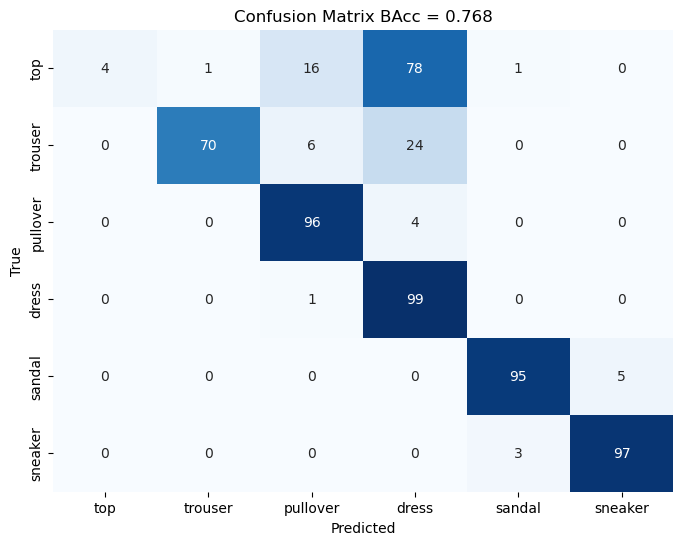

In [123]:
conf_matrix = confusion_matrix(valid_y, pred_y)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['top', 'trouser', 'pullover', 'dress', 'sandal', 'sneaker'],
            yticklabels=['top', 'trouser', 'pullover', 'dress', 'sandal', 'sneaker'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix BAcc = 0.768')
plt.show()

In [124]:
test_x = pd.read_csv(os.path.join("data_fashion", "x_test.csv")).to_numpy()
test_x = test_x[:210]